In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_absolute_error

sns.set(style="ticks", context="talk")
plt.style.use("dark_background")

In [70]:
revenue_results = pd.read_csv("movie_data/revenue_model.csv")
rating_results = pd.read_csv("movie_data/rating_model.csv")

## Revenue

In [71]:
revenue_results.columns

Index(['id', 'actual', 'predicted'], dtype='object')

In [73]:
# RMSE
np.sqrt(mean_squared_error(revenue_results["actual"], revenue_results["predicted"]))

93345079.20137572

In [75]:
# MAE
mean_absolute_error(revenue_results["actual"], revenue_results["predicted"])

47734000.49990385

In [76]:
# Median AE
median_absolute_error(revenue_results["actual"], revenue_results["predicted"])

19264564.37

In [77]:
# MAPE
revenue_results["abs_perc_error"] = np.abs((revenue_results["actual"] - revenue_results["predicted"]) / revenue_results["actual"])
np.mean(revenue_results["abs_perc_error"])

13.034620431983772

In [78]:
# Median APE
np.median(revenue_results["abs_perc_error"])

0.573962725137608

Text(0.5, 1.0, 'Residual Plot')

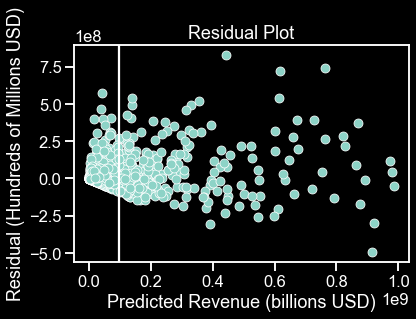

In [104]:
revenue_results["resid"] = revenue_results["actual"] - revenue_results["predicted"]
sns.scatterplot(data=revenue_results, x="predicted", y="resid")
plt.axvline(np.mean(revenue_results["actual"]))
plt.xlabel("Predicted Revenue (billions USD)")
plt.ylabel("Residual (Hundreds of Millions USD)")
plt.title("Residual Plot")

Text(0.5, 1.0, 'Residual Distribution')

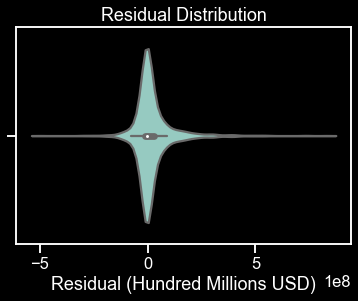

In [114]:
sns.violinplot(revenue_results["resid"])
plt.xlabel("Residual (Hundred Millions USD)")
plt.title("Residual Distribution")

Text(0.5, 1.0, 'Violin Plot of Absolute Percentage Error')

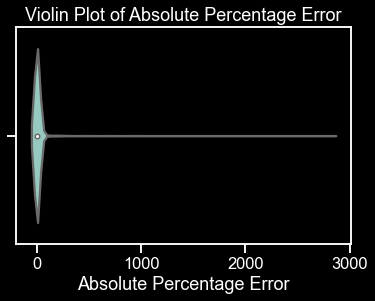

In [89]:
sns.violinplot(revenue_results["abs_perc_error"])
plt.xlabel("Absolute Percentage Error")
plt.title("Violin Plot of Absolute Percentage Error")

Text(0.5, 1.0, 'Absolute Percentage Error With Extreme Values Dropped')

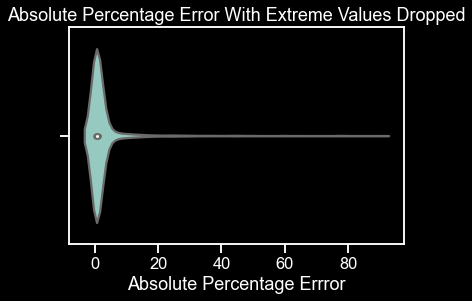

In [91]:
sns.violinplot(revenue_results[revenue_results["abs_perc_error"] < 100]["abs_perc_error"])
plt.xlabel("Absolute Percentage Errror")
plt.title("Absolute Percentage Error With Extreme Values Dropped")

## Ratings

In [94]:
# RMSE
np.sqrt(mean_squared_error(rating_results["actual"], rating_results["predicted"]))

0.7284383273791075

In [97]:
# MAE
mean_absolute_error(rating_results["actual"], rating_results["predicted"])

0.560075

In [98]:
# Median AE
median_absolute_error(rating_results["actual"], rating_results["predicted"])

0.4560000000000022

Text(0.5, 1.0, 'Residual Plot')

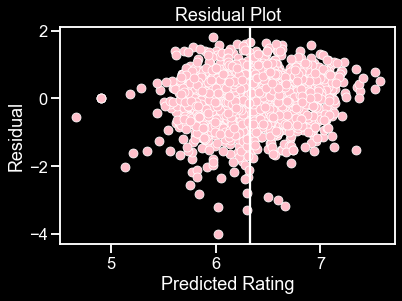

In [107]:
rating_results["resid"] = rating_results["actual"] - rating_results["predicted"]
sns.scatterplot(data=rating_results, x="predicted", y="resid", color="pink")
plt.axvline(np.mean(rating_results["actual"]))
plt.xlabel("Predicted Rating")
plt.ylabel("Residual")
plt.title("Residual Plot")

Text(0.5, 1.0, 'Residual Distribution')

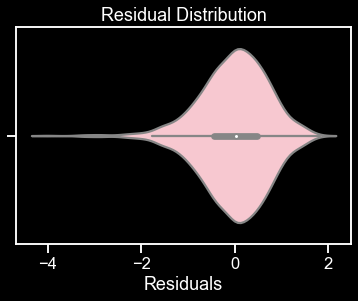

In [115]:
sns.violinplot(rating_results['resid'], color="pink")
plt.xlabel("Residuals")
plt.title("Residual Distribution")